In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [78]:
df5 = pd.read_csv("targets_5_data.csv")
df10 = pd.read_csv("targets_10_data.csv")
df15 = pd.read_csv("targets_15_data.csv")
df20 = pd.read_csv("targets_20_data.csv")
df25 = pd.read_csv("targets_25_data.csv")
df_avg_timeseries = pd.read_csv("timeseries.csv")

In [73]:
def draw_plot_sample_size(df, name, targets):
    df_groups = df.groupby("Sample_Size").mean()
    fig, ax1 = plt.subplots()
    ax1.set_xlabel('Sample Size')
    ax1.set_ylabel('Evaluation Time (s)')
    data_to_plot = df_groups[['Quantile', 'Sum', 'Average']]
    color = 'tab:red'
    line1, = ax1.plot(df_groups.index, df_groups['Quantile'], color=color, label='Quantile')
    ax1.scatter(df_groups.index, df_groups['Quantile'], s=15, marker='o', color=color, label='Quantile')
    color = 'tab:blue'
    line2, = ax1.plot(df_groups.index, df_groups['Sum'], color=color, label='Sum')
    ax1.scatter(df_groups.index, df_groups['Sum'], s=15, marker='o', color=color, label='Sum')
    color = 'tab:green'
    line3, = ax1.plot(df_groups.index, df_groups['Average'], color=color, label='Average')
    ax1.scatter(df_groups.index, df_groups['Average'], s=15, marker='o', color=color, label='Average')
    plt.legend(handles=[line1, line2, line3])
    plt.title("Sample Size vs Evaluation Time (s)", fontsize=16)
    plt.suptitle(f'Monitoring targets: {targets}', fontsize=12)
    plt.savefig(name, dpi=600, bbox_inches='tight')

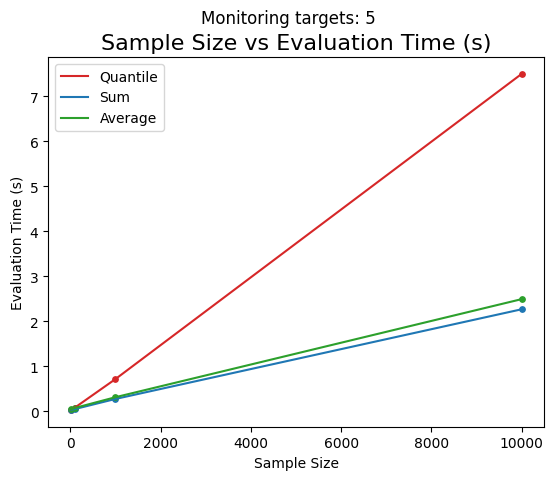

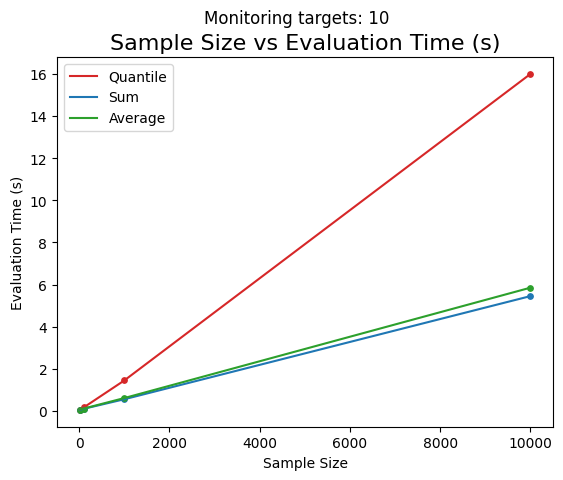

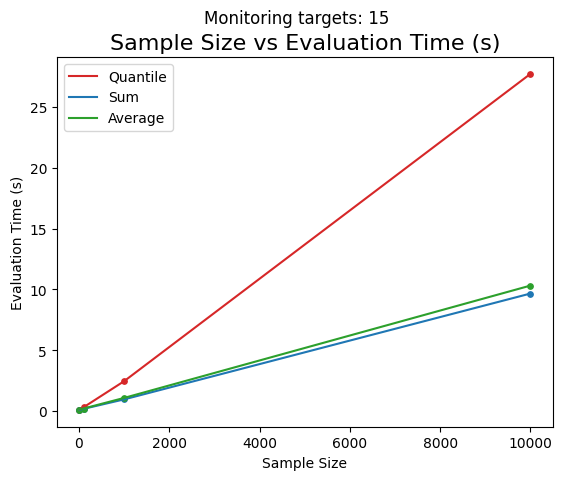

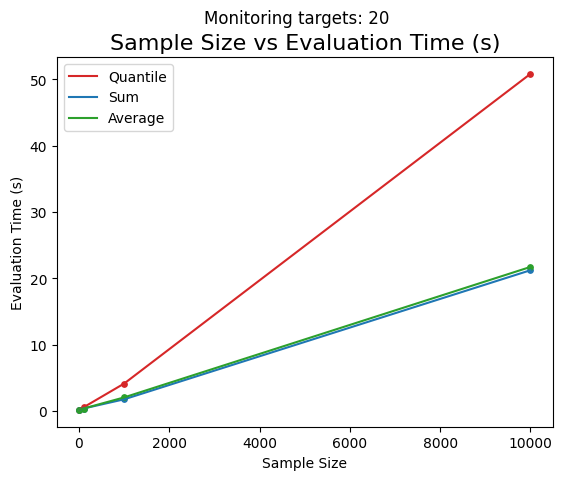

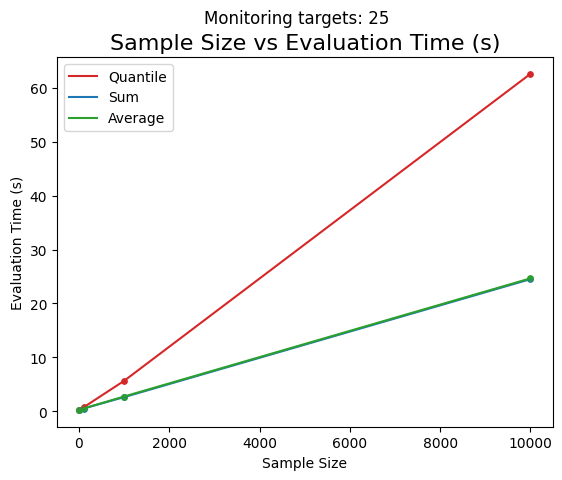

In [74]:
draw_plot_sample_size(df5, "5_targets.png", "5")
draw_plot_sample_size(df10,"10_targets.png", "10")
draw_plot_sample_size(df15,"15_targets.png", "15")
draw_plot_sample_size(df20,"20_targets.png", "20")
draw_plot_sample_size(df25,"25_targets.png", "25")

In [87]:
df_avg_timeseries= df_avg_timeseries.sort_values(by='Monitoring_Targets')
df_avg_timeseries.head(10)

,Monitoring_Targets,Quantile,Sum,Average
0,5,7.498857,2.266240,2.491586
3,10,15.996644,5.455034,5.854987
2,15,27.710066,9.654849,10.308021
4,20,50.811937,21.214120,21.711042
1,25,62.619694,24.502508,24.645508


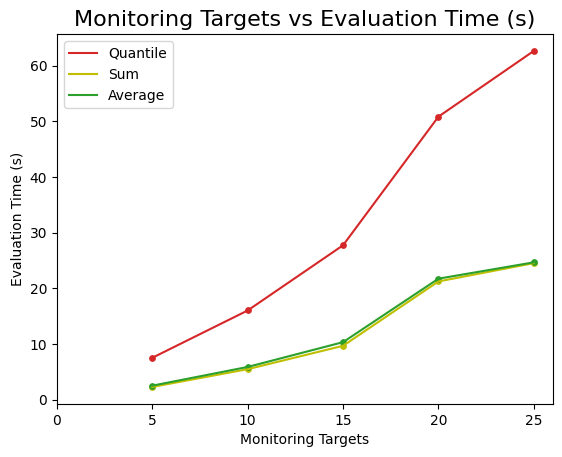

In [94]:
import numpy as np
fig, ax1 = plt.subplots()
ax1.set_xlabel('Monitoring Targets')
ax1.set_ylabel('Evaluation Time (s)')
color = 'tab:red'
line1, = ax1.plot(df_avg_timeseries['Monitoring_Targets'], df_avg_timeseries['Quantile'], color=color, label='Quantile')
ax1.scatter(df_avg_timeseries['Monitoring_Targets'], df_avg_timeseries['Quantile'], s=15, marker='o', color=color, label='Quantile')
color = 'y'
line2, = ax1.plot(df_avg_timeseries['Monitoring_Targets'], df_avg_timeseries['Sum'], color=color, label='Sum')
ax1.scatter(df_avg_timeseries['Monitoring_Targets'], df_avg_timeseries['Sum'], s=15, marker='o', color=color, label='Sum')
color = 'tab:green'
line3, = ax1.plot(df_avg_timeseries['Monitoring_Targets'], df_avg_timeseries['Average'], color=color, label='Average')
ax1.scatter(df_avg_timeseries['Monitoring_Targets'], df_avg_timeseries['Average'], s=15, marker='o', color=color, label='Average')
plt.legend(handles=[line1, line2, line3])
plt.xticks(np.arange(0, 30, 5)) 
plt.title("Monitoring Targets vs Evaluation Time (s)", fontsize=16)
plt.savefig("monitoring_targets.png", dpi=600, bbox_inches='tight')